## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

Dias Tashev

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

1. Подберите скорость обучения (alpha) и количество итераций.

In [16]:
n = X.shape[1]
# alpha = 1e-2

best_mse = np.inf   # added best mse metric = inf, so we could optimize algorithm in future
best_alpha = None   # added best_alpha
best_weights = None  # added best_weights for checkpointing

for alph in range(11): 
    alpha = (10**-alph) # iterate through the primary learning rates, to find the best value
    W = np.array([1, 0.5]) # regenerate weights every lr iteration

    for i in range(200): # increased range of iterations
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
        if i % 10 == 0:
            alpha /= 1.1
        if err < best_mse: # compare best metrics
            best_mse = err
            best_alpha = (10**-alph)
            best_weights = W.copy()

print(f'Best alpha: {best_alpha}')
print(f'Best weights: {best_weights}')
print(f'Best MSE: {best_mse}')

/var/folders/c4/gfl3dzhd2w90sn809ndq2z9m0000gn/T/ipykernel_83074/670166229.py:10: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)


Best alpha: 0.1
Best weights: [45.04904331  3.81494016]
Best MSE: 43.968837648351425


*2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.


In [15]:
n = X.shape[1]
alpha = 1e-1 # modified lr
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(200): # increased iterations 
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    gradient = 1/n * 2 * np.dot(X, (y_pred - y)) # added gradient calculation
    W -= alpha * gradient # counting new weights
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888022 42641607.37852192], MSE = 9128819654907590.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.327920364266858e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.545133529815953e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500147e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126476048e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528284046e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.1255335378744922e+19
Iteration #90: W_new = [116395.49987012 641638.79864496], MSE = 31317286806394.66
Iteration #100: W_new = [48.41965666 22.99884051], MSE = 53518.86
Iteration #110: W_new = [44.97715481  3.8279

*3. Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [23]:
import numpy as np

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
tol = 1e-10

print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \
       \nTolerance = {tol} \n')

prev_err = np.inf
i = 0
while True:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    gradient = 1/n * 2 * np.dot(X, (y_pred - y))
    W -= alpha * gradient
    if abs(prev_err - err) < tol:
        break
    prev_err = err
    i += 1

print(f'Stopped after {i} iterations: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5]        
Tolerance = 1e-10 

Stopped after 1406 iterations: W_new = [45.06239389  3.81251924], MSE = 43.97


In [28]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
W = np.array([45.06239389,3.81251924])

y_pred = np.dot(W, X)

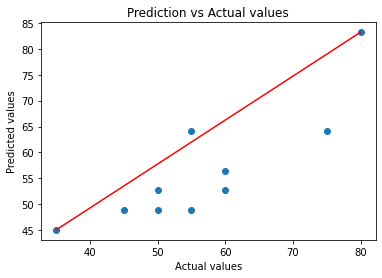

In [31]:
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y_pred), max(y_pred)], color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction vs Actual values')
plt.show()